# Credit Card Fraud Detection

## Context


It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


## Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


## Inspiration

Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.


## Business/Real world objectives and constraints

1. Low latency concerns
2. imbalanced dataset

# Machine learning problem

## Data

Data is stored in creditcard.csv  . 
Size of credit.csv is 143 Mb . 

## Type of Machine Learning Problem

It is binary classification problem , for a given transcation we have to predict its fradulant or non-fradulant .

## Performance matric

Metrics :
     ROC_AUC

## Importing libraries

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,confusion_matrix ,classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV

from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

## Reading File

In [86]:
df= pd.read_csv('creditcard.csv/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## DATA INFO:

In [87]:
print("DATA shape =",df.shape)

DATA shape = (284807, 31)


In [88]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Checking For Null Values

In [89]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

## Checcking Class Distribution 

In [90]:
print('Total Non Fradulant Transaction : ',df['Class'].value_counts()[0])
print('Total % of Non Fradulant Transaction : ',(df['Class'].value_counts()[0]/len(df)*100))
print('Total Fradulant Transaction : ',df['Class'].value_counts()[1])
print('Total % of Fradulant Transaction : ',(df['Class'].value_counts()[1]/len(df))*100)

Total Non Fradulant Transaction :  284315
Total % of Non Fradulant Transaction :  99.82725143693798
Total Fradulant Transaction :  492
Total % of Fradulant Transaction :  0.1727485630620034


<AxesSubplot:xlabel='Class', ylabel='count'>

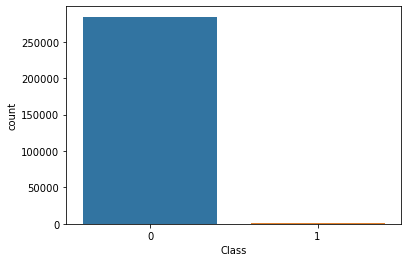

In [91]:
sns.countplot(data=df, x='Class')

 Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

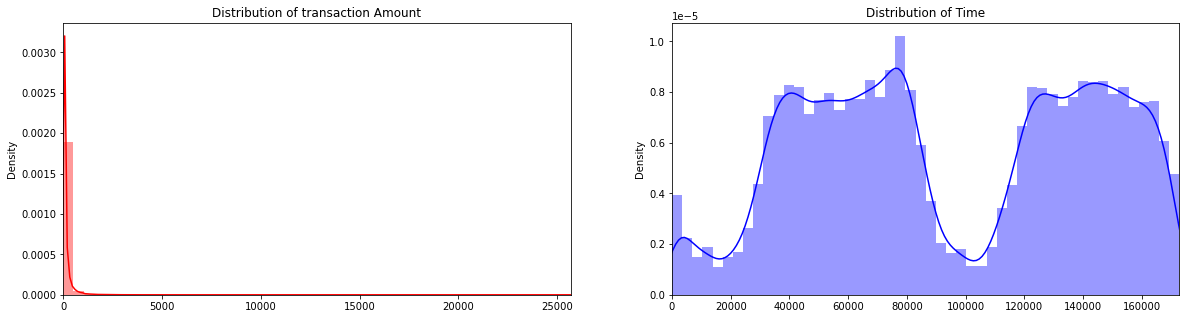

In [92]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of transaction Amount')
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Time')
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

## FEATURE SELECTION :

<AxesSubplot:>

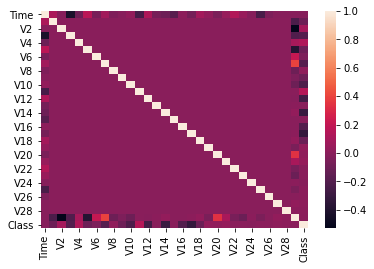

In [93]:
sns.heatmap(df.corr(),cbar = True)

There are too many features in the dataset and it is difficult to understand anything.
Hence, we will plot the correlation map only with the target variable.

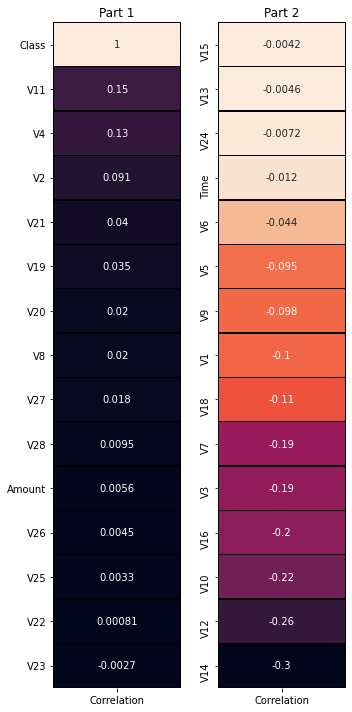

In [94]:
corr = df.corrwith(df['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

fig.tight_layout(w_pad = 2)

For feature selection, we will exclude the features having correlation values between [-0.1,0.1].

V4, V11 are positively correlated and V7, V3, V16, V10, V12, V14, V17, V18 are negatively correlated with the Class feature.

In [95]:
df1 = df[['V3','V4','V7','V10','V11','V12','V14','V16','V17','V18','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0


## SPLITTING DATASET INTO TRAIN and TEST 

In [96]:

X = df1.drop('Class', axis=1)
y = df1['Class']


x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=45)

## Hyperoptimized RANDOM FOREST Model

In [97]:
rf = RandomForestClassifier()

In [98]:
params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [3, 6, 9],
    'random_state': [13]
}

In [99]:
kf = KFold(n_splits=5, shuffle=False)

In [100]:
grid_opt = GridSearchCV(rf, param_grid=params, cv=kf, scoring='roc_auc').fit(x_train, y_train)

In [101]:
print('Best Cross Validation Score : ', grid_opt.best_score_)

Best Cross Validation Score :  0.9734003870332251


In [102]:
print('Best Validation Parameters : ',grid_opt.best_params_ )

Best Validation Parameters :  {'max_depth': 9, 'n_estimators': 30, 'random_state': 13}


In [103]:
print('roc socre on test set with best opt para:', roc_auc_score(y_test, grid_opt.predict(x_test))  )

roc socre on test set with best opt para: 0.9166033434650457


#  Hyperoptimized RANDOM FOREST Model Oversampled Data 

In [104]:
params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [3, 6, 9],
    'random_state': [13]
}

imba_pipeline = make_pipeline(RandomOverSampler(random_state=42), RandomForestClassifier(random_state=13))

new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='roc_auc',
                        return_train_score=True)
grid_imba.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [3, 6, 9],
                         'randomforestclassifier__n_estimators': [10, 20, 30],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='roc_auc')

In [105]:
print("BEST Cross Validation Parameters :" ,grid_imba.best_params_)

BEST Cross Validation Parameters : {'randomforestclassifier__max_depth': 9, 'randomforestclassifier__n_estimators': 30, 'randomforestclassifier__random_state': 13}


In [106]:
print('Best Cross Vaidation Score :',grid_imba.best_score_)

Best Cross Vaidation Score : 0.9734468096858094


In [107]:
y_test_predict = grid_imba.predict(x_test)
score_upsample = roc_auc_score(y_test, y_test_predict)

In [108]:
print('roc score After upsampling the DATA', score_upsample)

AUC score After upsampling the DATA 0.9341001253004028


# RESULTS

In [109]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "ROC_AUC"]
x.add_row(["Random Forest without UPSAMPLING", 0.9166033434650457])
x.add_row(["RANDOM Forest with UPSAMPLING", 0.9341001253004028])
print(x)

+----------------------------------+--------------------+
|              Model               |      ROC_AUC       |
+----------------------------------+--------------------+
| Random Forest without UPSAMPLING | 0.9166033434650457 |
|  RANDOM Forest with UPSAMPLING   | 0.9341001253004028 |
+----------------------------------+--------------------+
